<a href="https://colab.research.google.com/github/E23A48/MachineLearning_LSTM/blob/main/MachineLearning_TA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TA2**
**MACHINE LEARNING**
2020-2

Integrantes:
*   Piero Herrera
*   Camilo Silva


## **Introducción y motivación de uso**

*Para 1997*, las redes neuronales recurrentes o **recurrent neural networks** – RNN por sus siglas en inglés -, eran utilizadas para diversas aplicaciones tales como el procesamiento de voz o la composición musical, tal y como detallan Hochreiter et. Al en ***“Long Short-Term Memory”***. La principal ventaja de este tipo de red frente a los enfoques tradicionales es el hecho de poder procesar secuencias de datos mediante conexiones de retroalimentación que permitan cierta persistencia de los datos a corto plazo. 

*Por otro lado*, un problema conocido para la época era el hecho de que los algoritmos existentes para decidir qué poner en la memoria a corto plazo no funcionaban de la forma óptima. Además, almacenar información en intervalos de tiempos prolongados (memoria a largo plazo o ***long-term memory***), era un problema que tomaba demasiado tiempo debido a un error conocido como *flujo de retorno de error insuficiente*, lo que impide que se realice el aprendizaje de secuencias de datos largos y que fue estudiado a profundidad por Hochreiter en 1991 en su tesis de diplomado “Untersuchungen zu dynamischen neuronalen Netzen” (Investigaciones sobre redes neuronales dinámicas). 

Esto motivó a Sepp Hochreiter y Jürgen Schmidhuber a presentar en 1997 ***“Long Short-Term Memory”***, una arquitectura de red recurrente que lograba solucionar estos errores, principalmente, mediante la definición de un concepto conocido como “***celda de memoria***” que era incorporado a las redes recurrentes tradicionales, dichas celdas pueden mantener su valor durante un periodo de tiempo corto o largo, lo que aporta robustez a la arquitectura, permitiéndole operar sobre distintos tipos de secuencias con diferentes tipos de extensiones con un resultado óptimo, diferenciandolo del enfoque de las RNN. Específicamente, nos permiten abordar el problema de dependencia a largo plazo.

*En la actualidad*, la popularidad de la arquitectura recurrente **LSTM** ha crecido a tal punto de ser utilizado en diferentes tipos de aplicaciones, tales como reconocimiento de escritura o reconocimiento de voz por parte de grandes compañías como, por ejemplo, *IBM* o *Google*.


## **Cómo funciona**

*Como ya especificamos*, las redes neuronales **LSTM** son un caso especial de *RNN*, que son capaces de recordar datos relevantes en una secuencia de entrada, y preservarlo durante diferentes instantes de tiempo.

Podríamos, por ejemplo, hacer un símil entre cómo funcionan las **LSTM** y cómo el cerebro humano analiza las secuencias. Por ejemplo, mientras leemos un artículo científico entendemos la información en un momento actual a partir de las palabras leídas en momentos previos, no desechamos la información obtenida en cada momento pues sería complicado entender las palabras actuales. Si las *RNN* recordaban únicamente palabras previas, las **LSTM** buscan entonces recordar la información más importante leídas desde el primer instante al instante actual y enviar conocimiento hacia instantes futuros.

En el siguiente gráfico, podemos observar, a la izquierda la arquitectura clásica de una *RNN*. Por otro lado, a la derecha, tenemos la arquitectura de una **LSTM**. Como se muestra, la **LSTM** cuenta con una entrada y una salida adicional, y son justamente estos elementos quienes conforman la ***celda de memoria***, que es la base del funcionamiento de este tipo de redes


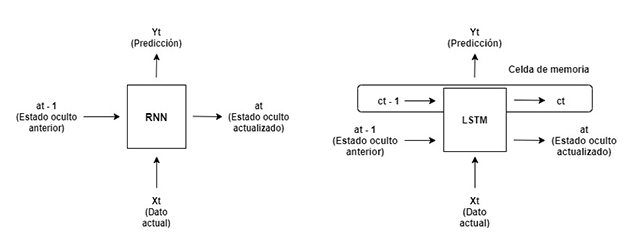

*Ahora bien*, para poder controlar cómo fluye la información dentro de la celda de memoria, se usan 3 tipos de compuertas. ***Forget gate***, que permite olvidar partes de la información para recordar nuevos datos, ***update gate***, que permite añadir nuevos datos a la memoria y ***output gate*** que permite crear el estado oculto actualizado.

*Cada compuerta* esta compuesta por los mismos elementos. Una capa de *red neuronal*, una capa de *función sigmoidal*, y una capa de *elemento multiplicador*. El resultado de la capa sigmoidal representa cuánta información de cada componente debe dejar pasarse, actuando como válvula, el valor será 0 si es que no se deja pasar nada, o 1, dejar pasar todo. Es de esta forma en la cual la red **LSTM** logra que la información más importante persista desde el primer instante en que esta ingresa. La siguiente imagen grafica la forma en que actúan estas compuertas.


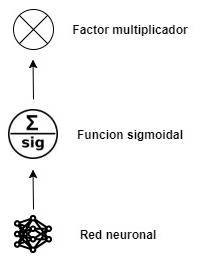

Como ya especificamos, cada una de estas compuertas cumple un rol vital para mantener la información a lo largo de la red. De forma aún más detallada, podemos listar las operaciones que se realizan para lograr dicho fin:

La compuerta forget gate, toma el estado oculto anterior y la entrada actual, los transforma y los lleva a la función sigmoidal, obteniendo el vector $f_{t}$ , la siguiente operación define la forma en la que esta trabaja, $f_{t}=sigmoidal(W_{f}[a_{t-1}, x_{t}] + b_{f})$. En este punto, puede ocurrir que uno de los valores de dicho vector de salida pueda ser 0 o cercano a 0, con lo que se eliminaría toda o parte la información, por otro lado si es 1 o cercano a 1, la información llegará a la celda de memoria, como se mencionó anteriormente.

La compuerta update gate, por otro lado, toma el estado oculto anterior y la entrada actual nuevamente y genera la función $u_{t}$, de la siguiente forma $u_{t}=sigmoidal(W_{i}[a_{t-1}, x_{t}] + b_{i})$.

Una vez que se generan los datos de las compuertas update y forget gate, se puede actualizar la celda de memoria, para ello en un primer momento se multiplica el factor anterior de la celda $c_{t - 1}$, con el valor generado por la puerta forget $f_{t}$, $f_{t} * c_{t - 1}$. Luego, se crea un vector de valores candidatos que formarán parte de la nueva memoria, $c_{t}=sigmoidal(W_{c}[a_{t-1}, x_{t}] + b_{c})$, además, se multiplicará por el valor generado por la puerta update  $u_{t} * c_{t}$, la operación final de aplicar estas operaciones es la siguiente: $f_{t} * c_{t - 1} + u_{t} * c_{t}$.

Finalmente, para calcular el estado oculto se hace uso de la output gate, como ya se mencionó, la cual es una versión de la celda de memoria, escalada en un rango de $[-1, 1]$ mediante la función tangente hiperbólica, la operación que realiza la output gate para generar el resultado del próximo estado oculto, es la siguiente: $o_{t}=o(W_{o}[a_{t-1}, x_{t}] + b_{o})$, terminando así el proceso de la LSTM.


## **Bibliotecas**

A continuación, algunas de las librerías que incorporan esta red neuronal en el lenguaje de programación *Python*:



1.   [Neon](https://github.com/NervanaSystems/neon): Framework de Intel de aprendizaje profundo basada en el rendimiento. Incorpora, entre otros, CNN, RNN, LSTM, GRU, BatchNorm y más. Actualmente el proyecto se encuentra descontinuado segun su repositorio oficial.
2.   [OpenDeep](https://github.com/vitruvianscience/OpenDeep): Framework de aprendizaje profundo creado desde cero en Theano, basado en flexibilidad y facilidad de uso.
3. [GroundHog](https://github.com/lisa-groundhog/GroundHog): Framework de Python sobre Theano, únicamente incorpora modelos complejos de redes neuronales recurrentes. Además, admite una variedad de capas recurrentes, como DT-RNN, DOT-RNN, RNN y LSTM. El proyecto se encuentra descontinuado.
4. [Keras](https://github.com/keras-team/keras): API de DeepLearning escrita en Python que se ejecuta sobre la plataforma de TensorFlow. Se encuentra descontinuado, y sugiere usar la API incorporada en TensorFlow según su repositorio oficial.

5. [Pytorch](https://github.com/pytorch/pytorch): La conocida biblioteca de aprendizaje automático también incorpora este tipo de redes neuronales, según su documentación oficial.

6. [Clstm](https://github.com/tmbdev/clstm): Implementación del modelo de red neuronal recurrente escrita en C++ que hace uso de la biblioteca Eigen para calculos numéricos. Cuenta con un API para Python implementada.

7. [Tensorflow](https://github.com/tensorflow/tensorflow): Biblioteca de código abierto que mantiene Google, ampliamente utilizada en aprendizaje automático. Incorpora Keras, descrita anteriormente, y por tanto las redes neuronales LSTM.


Luego de comparar las múltiples opciones de bibliotecas, consideramos que las opciones más recomendadas son ***Pytorch*** y ***Keras Tensorflow***, debido a que cuentan con el respaldo de la comunidad, y son ampliamente utilizadas, además de contar con amplia documentación, por lo que, para un usuario nuevo, puede resultar sencillo empezar a utilizar este tipo de redes neuronales.


## **Ejemplos de aplicaciones**

## **Conclusiones**

En conclusión, las redes neuronales ***LSTM*** son un tipo especial de redes neuronales recurrentes que nos permiten abordar específicamente el problema de *dependencia a largo plazo*, mediante el uso de una unidad conocida como celda de memoria, que permite que la información que entra a la red persista a través del tiempo, modificando, eliminando y actualizando la información gracias a su mecanismo de compuertas a lo largo del proceso. Mantener la información a lo largo del proceso le brinda a esta red cierta robustez que permitirá que sus resultados sean óptimos para datos secuenciales que requieran una mayor dependencia entre los mismos. Siendo esta la principal ventaja frente a su predecesor. 



## **Referencias**

Hochreiter, S., & Schmidhuber, J. (1997, 1 diciembre). Long Short-term Memory. ResearchGate. https://www.researchgate.net/publication/13853244_Long_Short-term_Memory

Özlü, A. (2020, 13 junio). Long Short Term Memory (LSTM) Networks in a nutshell. Medium. https://medium.com/@ahmetozlu93/long-short-term-memory-lstm-networks-in-a-nutshell-363cd470ccac

Yan, S. (2018, 21 junio). Understanding LSTM and its diagrams - ML Review. Medium. https://medium.com/mlreview/understanding-lstm-and-its-diagrams-37e2f46f1714


Introducing deep learning and long-short term memory networks. (2018). IBM Developer. https://developer.ibm.com/technologies/iot/tutorials/iot-deep-learning-anomaly-detection-1/

Arquitecturas de aprendizaje profundo. (2015). IBM Developer. https://developer.ibm.com/es/technologies/deep-learning/articles/cc-machine-learning-deep-learning-architectures/

¿Qué es una red LSTM? | Curso redes neuronales recurrentes - Parte 4. (2019, 20 julio). [Vídeo]. YouTube. https://www.youtube.com/watch?v=1BubAvTVBYs